### Lvbel C5 Lyrics Analysis: Themes, Trends, and Recurring Concepts

This notebook explores the themes and word usage in the lyrics of Turkish rapper **Lvbel C5**. We perform text cleaning, extract common words, analyze trends like romance-related word usage over the years, and visualize the results with charts and a word cloud.

Dataset: ~40 songs manually collected from Genius.com  
Language: Turkish  
Tools: Pandas, Matplotlib, WordCloud



## Importing Related Libraries and Adding The Database Into Dataframe

In [1]:
import sqlite3
import pandas as pd

connect = sqlite3.connect(r"C:\Users\kutayd\sqlite\lvbelc5_lyrics.db")
query = "SELECT * FROM lyrics"

df = pd.read_sql_query(query, connect)
df.head()

,id,song_title,artist,featured_artists,album,release_year,lyrics
0,1,BEMBEYAZ KEFENDEN,Lvbel C5,None,C5MODE,2022,"Bembeyaz kefenden Polo bu\nGözlük Prada, şapka..."
1,2,BANA GÖNDER!,Lvbel C5,None,None,2023,Bana gönder\nSarışın yeşil gözlü kızların heps...
2,3,İZLEDİ MAHALLE,Lvbel C5,None,None,2023,"Lvbel, Lvbel C5 okey\nAuh, woah\nDedi bana ""Ba..."
3,4,İbrahim Tilaver,Lvbel C5,None,None,2022,"Alaaddin'e verdim dumanlar, bebeğim\nKafasında..."
4,5,AH YALAN DÜNYA,Lvbel C5,None,#1,2024,"Kızım, bana ne?\nN'apıyo'san yap kızım, bana n..."


## Text Cleaning Funtion

In [49]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words("turkish"))
# clean the lyrics lowercase, remove punctuation, tokenize, and remove stopwords
def clean_lyrics(text): 
    if not isinstance(text, str) or text.strip() == "": # to ensure if it's actually a string and not empty
        return ""

    text = text.lower()
    tokens = re.findall(r'\b[a-zçğıöşü]{2,}\b', text)     # i didn't use split because there is a lot of useless words in the lyrics
    filtered = [word for word in tokens if word not in stop_words] # Remove stopwords
    
    return " ".join(filtered)

df["cleaned_lyrics"] = df["lyrics"].apply(clean_lyrics)
df[["song_title", "cleaned_lyrics"]].head()

,song_title,cleaned_lyrics
0,BEMBEYAZ KEFENDEN,bembeyaz kefenden polo gözlük prada şapkamsa g...
1,BANA GÖNDER!,bana gönder sarışın yeşil gözlü kızların hepsi...
2,İZLEDİ MAHALLE,lvbel lvbel okey auh woah dedi bana baba kıyaf...
3,İbrahim Tilaver,alaaddin verdim dumanlar bebeğim kafasından do...
4,AH YALAN DÜNYA,kızım bana apıyo san yap kızım bana benim hiçb...


## Count The Most Repeated Words

In [3]:
from collections import Counter

all_words = " ".join(df["cleaned_lyrics"]).split() # combine all cleaned lyrics into 1 big string
word_freq = Counter(all_words) # to count all words
top_10 = word_freq.most_common(10)
top_10

[('var', 79),
 ('bana', 72),
 ('la', 69),
 ('roar', 65),
 ('ah', 59),
 ('baba', 57),
 ('he', 53),
 ('ben', 50),
 ('bi', 49),
 ('tamam', 43)]

## Adding Custom Stop Words To Improve

In [4]:
custom_stopwords = {
    'la', 'ah', 'he', 'tamam', 'bi', 'baba', 'ben', 'bana', 'var', 'roar'
}
stop_words.update(custom_stopwords)

In [40]:
df["cleaned_lyrics"] = df["lyrics"].apply(clean_lyrics) # cleaning the lyrics again with the updated stopwords

# Count words again
all_words = " ".join(df["cleaned_lyrics"]).split()
word_freq = Counter(all_words)
top_10 = word_freq.most_common(10)
top_10

[('lvbel', 42),
 ('ver', 42),
 ('beni', 42),
 ('yeah', 41),
 ('atm', 41),
 ('bak', 40),
 ('grr', 40),
 ('yok', 38),
 ('bebeğim', 37),
 ('benim', 37)]

## Custom Stopword Tuning

In [6]:
custom_stopwords_2 = {'ha'}
stop_words.update(custom_stopwords_2)

## Analyzing Common Words For Visualizations

In [41]:
df["cleaned_lyrics"] = df["lyrics"].apply(clean_lyrics) # cleaning the lyrics again with the updated stopwords

# Count words again
all_words = " ".join(df["cleaned_lyrics"]).split()
word_freq = Counter(all_words)
top_10 = word_freq.most_common(10)
top_10

[('lvbel', 42),
 ('ver', 42),
 ('beni', 42),
 ('yeah', 41),
 ('atm', 41),
 ('bak', 40),
 ('grr', 40),
 ('yok', 38),
 ('bebeğim', 37),
 ('benim', 37)]

## Tracking Themed Words

In [16]:
targets = ['sarışın', 'kız', 'kadın', 'bebeğim', 'baby', 'kızlar', 'kadınlar', 'bayan', 'bayanlar']

girl_word_counts = Counter(" ".join(df['cleaned_lyrics']).split())
for word in targets:
    print(f"{word}: {girl_word_counts[word]}")

sarışın: 9
kız: 9
kadın: 1
bebeğim: 37
baby: 16
kızlar: 16
kadınlar: 0
bayan: 0
bayanlar: 0


In [17]:
money_words = ['atm', 'para', 'tl', 'dolar', 'zengin', 'altın', 'nakit', 'cash', 'money', 'kart', 'harca']
gang_words = ['grr', 'vur', 'silah', 'ateş', 'öldür', 'mafya', 'çete', 'kaç', 'kan', 'ghetto']

In [19]:
money_word_counts = Counter(" ".join(df['cleaned_lyrics']).split())
for word in money_words:
    print(f"{word}: {money_word_counts[word]}")

atm: 41
para: 3
tl: 1
dolar: 3
zengin: 1
altın: 0
nakit: 0
cash: 3
money: 0
kart: 0
harca: 0


In [42]:
gang_word_counts = Counter(" ".join(df['cleaned_lyrics']).split())
for word in gang_words:
    print(f"{word}: {gang_word_counts[word]}")

grr: 40
vur: 2
silah: 1
ateş: 0
öldür: 0
mafya: 0
çete: 0
kaç: 2
kan: 1
ghetto: 0


I applied a function to count themed words in each song

In [23]:
romance_words = ['sarışın', 'kız', 'kadın', 'bebeğim', 'baby', 'kızlar', 'kadınlar', 'bayan', 'bayanlar', 'aşk', 'sevgilim', 'aşkım', 'babe']

def count_theme_words(text, theme_list):
    words = text.split()
    word_freq = Counter(words)
    return sum(word_freq[word] for word in theme_list if word in word_freq)

In [24]:
df['romance_count'] = df['cleaned_lyrics'].apply(lambda x: count_theme_words(x, romance_words))
df[['song_title', 'romance_count']].sort_values(by='romance_count', ascending=False).head(10)

,song_title,romance_count
18,dans,14
28,Sezen Aksu,10
33,‎nE !?,8
30,GÖNDER GELSİN,7
1,BANA GÖNDER!,7
37,HAVHAVHAV,6
0,BEMBEYAZ KEFENDEN,5
34,DOĞUŞTAN BERİ HAKLIYIM (tmm),5
5,PRENSES,5
31,SUBMARINER,5


In [43]:
romance_yearly = df.groupby('release_year')['romance_count'].sum().reset_index()
romance_yearly

,release_year,romance_count
0,2019,0
1,2020,0
2,2021,4
3,2022,24
4,2023,14
5,2024,40
6,2025,29


## Visualizations

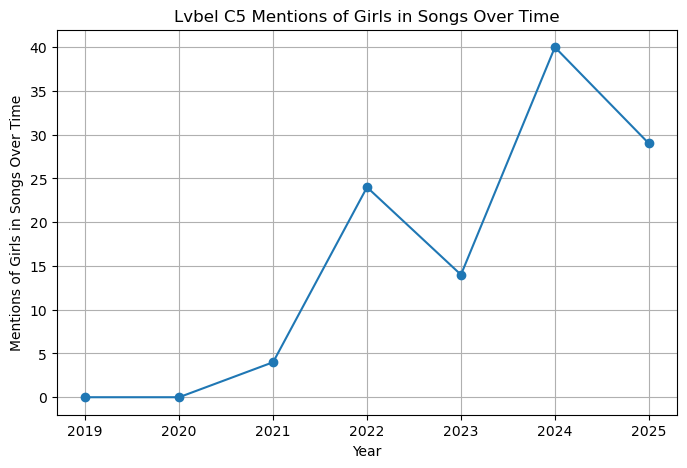

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(romance_yearly['release_year'], romance_yearly['romance_count'], marker='o')
plt.title('Lvbel C5 Mentions of Girls in Songs Over Time')
plt.xlabel('Year')
plt.ylabel('Mentions of Girls in Songs Over Time')
plt.grid(True)
plt.show()


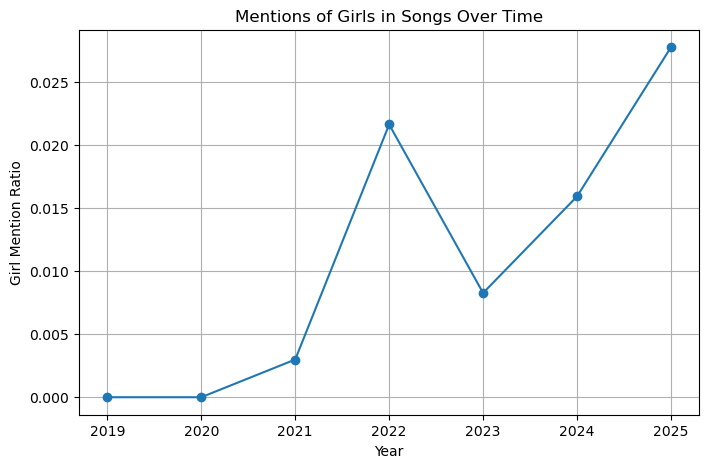

In [50]:
romance_word_list = ['sarısın', 'kız', 'kadın', 'bebeğim', 'baby', 'kızlar', 'kadınlar', 'bayan', 'bayanlar']
df['romance_word_count'] = df['cleaned_lyrics'].apply(lambda x: sum([x.split().count(word) for word in romance_word_list]))
df['total_word_count'] = df['cleaned_lyrics'].apply(lambda x: len(x.split()))
df['romance_ratio'] = df['romance_word_count'] / df['total_word_count']

romance_ratio_yearly = df.groupby('release_year')['romance_ratio'].mean().reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(romance_ratio_yearly['release_year'], romance_ratio_yearly['romance_ratio'], marker='o')
plt.title('Mentions of Girls in Songs Over Time')
plt.xlabel('Year')
plt.ylabel('Girl Mention Ratio')
plt.grid(True)
plt.show()


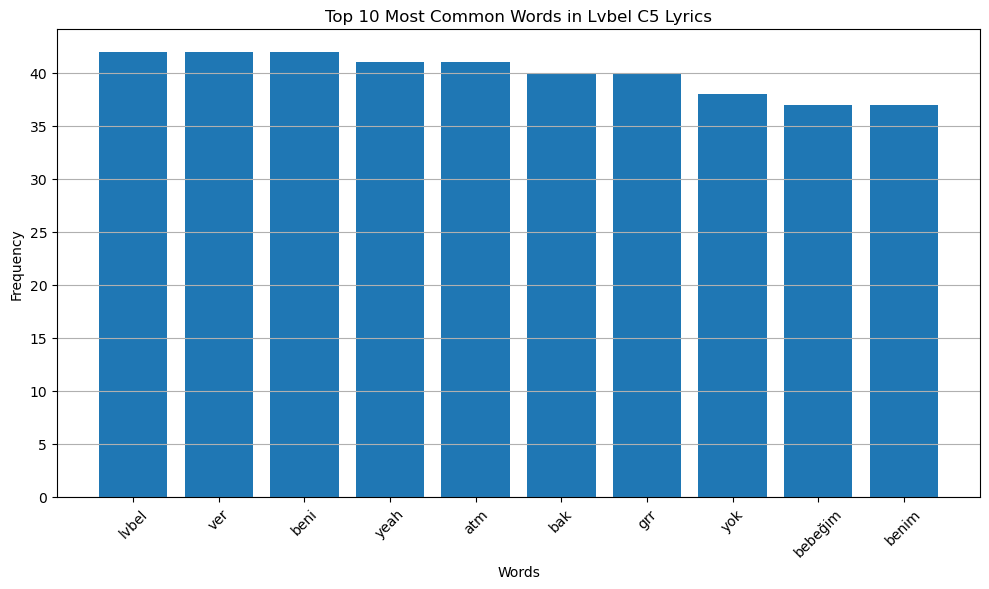

In [28]:
# Combine all cleaned lyrics into a single string and split into words
all_words = " ".join(df['cleaned_lyrics']).split()

# Count word frequencies
word_freq = Counter(all_words)
top_10 = word_freq.most_common(10)

# Separate the words and their counts
words, counts = zip(*top_10)

# Plotting
plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Lvbel C5 Lyrics')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

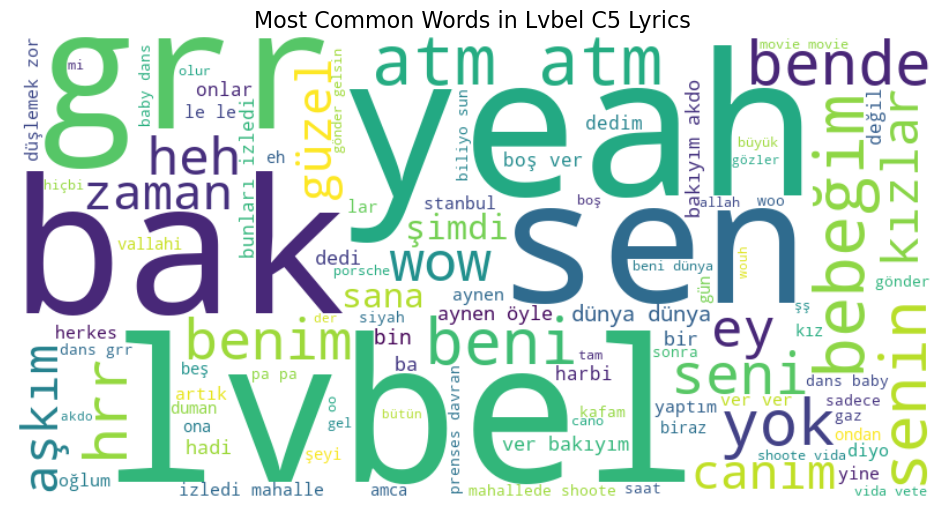

In [39]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
).generate(" ".join(all_words))  # join list into string


plt.figure(figsize=(12, 6))  #plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Lvbel C5 Lyrics', fontsize=16)
plt.show()

##  Final Thoughts

- Romantic language in Lvbel C5's lyrics has increased significantly since 2021, peaking in 2024.
- Common words reflect his persona and slang style — with high frequency of terms like *lvbel*, *yeah*, *bebeğim*, and *bak*.
- Surprisingly, gang-related or money-themed words were less frequent than expected.

More songs would enhance the accuracy of this analysis, but this gives a fun snapshot into his lyrical themes.
